# Lectures 1-4: CSCI 3022


Practice with EDA and Intro to Pandas to accompany Lectures 1-4.


# Intro to Exploratory Data Analysis Using Moneyball Data

The book (and later a movie) [Moneyball, by Michael Lewis,](https://en.wikipedia.org/wiki/Moneyball) tells the story of how the USA baseball team Oakland Athletics in 2002 leveraged the power of data instead of relying on experts.
Better data and better analysis of the data lead them to find and use market inefficiencies.

The team was one of the poorest in a period when only rich teams could afford the all-star players      (the imbalance in total salaries being something like 4 to 1).

A new ownership in 1995 was improving the team’s wins, but in 2001 the loss of 3 key players and budget cuts were led to a new idea: take a quantitative approach and find undervalued players.

The traditional way to select players was through scouting, but Oakland's general manager Billy Bean (Brad Pitt in the movie) decided to try a new approach and select the players using statistical analysis. Specifically, his assistant – the Harvard graduate Paul DePodesta (played by Jonah Hill in the movie)-  looked at the data to find which ones were the undervalued skills.

We will revisit some of their analysis using the actual dataset they analyzed, provided on the website Kaggle:  https://www.kaggle.com/datasets/wduckett/moneyball-mlb-stats-19622012?resource=download;  



Once exposed (with the help of Lewis’s best-seller), competitive forces were set in motion
as teams sought to replicate or improve upon the A’s formula. Oakland’s competitors sought success by attempting to hire the personnel management team assembled by Alderson. The two Ivy Leaguers mentioned above were hired as General Managers (that is, as executives with authority over personnel decisions) by the
Toronto Blue Jays and the Los Angeles Dodgers during and after the 2003 season
(Saraceno, 2004). Although the Boston Red Sox failed in their attempt to hire both
the Athletics’ General Manager (Billy Beane) and Assistant General Manager, they
followed Beane’s advice by hiring the similarly inclined Theo Epstein, making him
the youngest General Manager in baseball history (Shaughnessy, 2003). In addition, the Red Sox hired the dean of sabermetrics, Bill James himself, in an advisory capacity. The Red Sox proceeded to win the World Series in 2004.

This diffusion of statistical knowledge across a handful of decision-making
units in baseball was apparently sufficient to correct the mispricing of skill. The
underpayment of the ability to get on base was substantially if not completely
eroded within a year of Moneyball’s publication


<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />


# Key Considerations in Exploratory Data Analysis:

  - 1).   Structure -- what is the “shape” of a data file?

  - 2). Granularity -- what type of data does each record represent? how fine/coarse is each record in your data?

  - 3). Scope -- does the data cover the target population?

  - 4). Temporality -- how is the data situated in time?

  - 5).  Faithfulness -- how well does the data capture “reality”


***
## EDA - 1).  What is the Structure of the Data?

We refer to a dataset’s **structure** as a mental representation of the data, and in particular, we represent data that have a table structure by arranging values in rows and columns. 

**Guiding Questions**
     
   - What is the size of the data?
   - What type of file is it? (Do we trust this file extension?)
   - Are the data organized in records or nested?
   - Can we define records by parsing the data?
   - Can we reasonably un-nest the data?
   - Does the data reference other data?
   - Can we join/merge the data? (Do we need to)?
   - What are the fields in each record?
    - How are they encoded?  (e.g., strings, numbers, binary, dates …)
     - What is the variable type of the data for our purposes?


### How big is the data?
I often like to start my analysis by getting a rough estimate of the size of the data. This will help inform the tools I use and how I view the data. If it is relatively small I might use a text editor or a spreadsheet to look at the data. If it is larger, I might jump to more programmatic exploration or even used distributed computing tools.

However here we will use python tools to probe the file:


In [1]:
moneyball_file = "data/baseball.csv"

In [2]:
#the following line imports a module called os (https://docs.python.org/3/library/os.html)
import os

#We use functions in the os module to get the size of the data and print the result:
print(moneyball_file, "is", os.path.getsize(moneyball_file) / 1e6, "MB")

data/baseball.csv is 0.067157 MB


I might also want to investigate the number of lines, which often corresponds to the number of records:

In [3]:
with open(moneyball_file, "r") as f:
    print(moneyball_file, "is", sum(1 for l in f), "lines.")

data/baseball.csv is 1233 lines.


### Based on the structure, how do we read the file into this notebook?
Since this is not a huge file, before loading it we can check out the structure of the raw file directly in JupyterLab.

Click on the left side menu and double click on the 'baseball.csv' file

## Pandas module:
***
**Pandas** is an open source $\color{red}{\text{data analysis module}}$ in Python used for storing, cleaning, wrangling, and analyzing data.   (Fun fact: It was named as a shortcut for the term "$\textbf{pan}$el  $\textbf{da}$ta", a common term for multidimensional data sets encountered in statistics and econometrics.)





First, let's import the Pandas module.  It's custom in data science to import Pandas with the alias $\texttt{pd}$.  We can then access any function in the Pandas libraries by prepending function names by $\texttt{pd.}$  

In [4]:
import pandas as pd

/var/folders/2p/d_nj_y2s0p32_2p156bn343c0000gn/T/ipykernel_36695/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### $\color{red}{\textbf{Pandas}}$ Data Structures




Pandas has three types of data structures: 
- **Series**: A one dimensional array with labeled indices (can be mixed data types). 
-  **DataFrame**: 2D tabular data structure with both row and column labels.  $\color{red}{\text{Rows}}$ have a specific index to access them, which can be $\color{red}{\text{any name or value}}$. The $\color{blue}{\text{columns}}$ are just $\color{blue}{\text{Pandas Series}}$. The Pandas DataFrame data structure can be seen as a spreadsheet, but it is much more flexible. 
-  **Index**:  A sequence of row/column labels


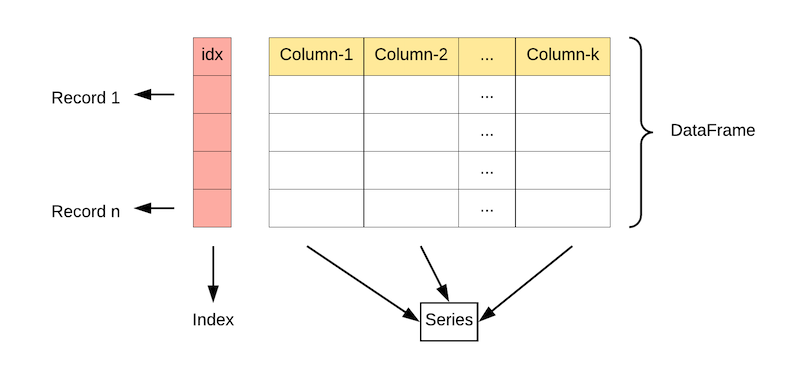

### Loading Data Into a DataFrame:

Panda's [read_csv function](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) is one of the most versatile and useful functions for managing data.  

Since we're loading a csv file,  the data is already in tabular format, and each row represents a record of team statistics for a given year, we don't have to add any additional inputs to the function for this file:

In [5]:
baseball = pd.read_csv("data/baseball.csv")
baseball

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,PHI,NL,1962,705,759,81,0.330,0.390,0.260,0,NaN,NaN,161,NaN,NaN
1228,PIT,NL,1962,706,626,93,0.321,0.394,0.268,0,NaN,NaN,161,NaN,NaN
1229,SFG,NL,1962,878,690,103,0.341,0.441,0.278,1,1.0,2.0,165,NaN,NaN
1230,STL,NL,1962,774,664,84,0.335,0.394,0.271,0,NaN,NaN,163,NaN,NaN


### Viewing Data in DataFrames:

Two useful methods for viewing dataframes are:

`.head()`(https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html)


`.tail()`


In [6]:
#Default of the .head() method is to show the first 5 rows. If you want to see n rows, enter .head(n)

baseball.head()


,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


**Practice:  Select the last 8 rows of the DataFrame:**

In [7]:
# Use .tail() to select the last 8 rows of the DataFrame:
baseball.tail(8)

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
1224,MLN,NL,1962,730,665,86,0.326,0.403,0.252,0,NaN,NaN,162,NaN,NaN
1225,NYM,NL,1962,617,948,40,0.318,0.361,0.240,0,NaN,NaN,161,NaN,NaN
1226,NYY,AL,1962,817,680,96,0.337,0.426,0.267,1,2.0,1.0,162,NaN,NaN
1227,PHI,NL,1962,705,759,81,0.330,0.390,0.260,0,NaN,NaN,161,NaN,NaN
1228,PIT,NL,1962,706,626,93,0.321,0.394,0.268,0,NaN,NaN,161,NaN,NaN
1229,SFG,NL,1962,878,690,103,0.341,0.441,0.278,1,1.0,2.0,165,NaN,NaN
1230,STL,NL,1962,774,664,84,0.335,0.394,0.271,0,NaN,NaN,163,NaN,NaN
1231,WSA,AL,1962,599,716,60,0.308,0.373,0.250,0,NaN,NaN,162,NaN,NaN


### Determine what each variable in your dataset represents:

From the Kaggle webpage (https://www.kaggle.com/datasets/wduckett/moneyball-mlb-stats-19622012?resource=download) we can see that the columns are as follows:

 |Column|Description|
 | --- | --- |
 |Team|  |
 |League |  |
 |Year | |
 |Runs Scored (RS) | |
 |Runs Allowed (RA)| Number of runs the opponents scored against this team|
 |Wins (W) | wins in the season  |
 |[On-Base Percentage (OBP)](https://www.baseball-reference.com/bullpen/On_base_percentage)| Measure of how often a batter reaches base. It is approximately equal to Times on Base/Plate appearances.                              The full formula is OBP = (Hits + Walks + Hit by Pitch) / (At Bats + Walks + Hit by Pitch + Sacrifice Flies). Batters are not credited with reaching base on an error or fielder's choice, and they are not charged with an opportunity if they make a sacrifice bunt. | 
 |Slugging Percentage (SLG) | Number of total bases divided by the number of at bats. Its formula is ([Singles] + [Doubles x 2] + [Triples x 3] + [Home Runs x 4])/[At Bats] , where **at bats** are the total of hits, outs (except sac hits and flies) and times reached by error. An at bat differs from a plate appearance, which counts every time a batter comes to bat in a game situation, as the number of at bats excludes certain results such as walks, hit by pitch, sacrifice hits, and sacrifice flies. At bats are used to calculate batting average and slugging percentage, while plate appearances are used to calculate on-base percentage.| 
 |Batting Average (BA)|Calculated by dividing the total number of hits by the total number of at-bats|
|Playoffs (binary) |(0 = didn’t make to the playoffs; 1 = did make). [Here's info on how teams qualify for the playoffs](https://www.mlb.com/news/mlb-playoff-format-faq)
 |
 |RankSeason | |
|RankPlayoffs |  |
 |Games Played (G)| |
 |Opponent On-Base Percentage (OOBP)| |
 |Opponent Slugging Percentage (OSLG) | |

### Variable Types
It's important to check if the variable type corresponds to how you would interpret the data.  Sometimes quantitative data is loaded as a string (and needs to be converted) or sometimes data that appears quantitative (1, 2, 3) is actually a code to represent a qualitative feature.  We will dive more deeply into variable types when we discuss visualizing data in the next lesson.

A quick way to view the datatypes of all your columns is the 

`.info()` method

In [8]:
baseball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Team          1232 non-null   object 
 1   League        1232 non-null   object 
 2   Year          1232 non-null   int64  
 3   RS            1232 non-null   int64  
 4   RA            1232 non-null   int64  
 5   W             1232 non-null   int64  
 6   OBP           1232 non-null   float64
 7   SLG           1232 non-null   float64
 8   BA            1232 non-null   float64
 9   Playoffs      1232 non-null   int64  
 10  RankSeason    244 non-null    float64
 11  RankPlayoffs  244 non-null    float64
 12  G             1232 non-null   int64  
 13  OOBP          420 non-null    float64
 14  OSLG          420 non-null    float64
dtypes: float64(7), int64(6), object(2)
memory usage: 144.5+ KB


### Other Useful Utility Functions


`.shape`

`.describe()`

In [9]:
baseball.shape

(1232, 15)

In [10]:
baseball.describe()

,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
count,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,244.000000,244.000000,1232.000000,420.000000,420.000000
mean,1988.957792,715.081981,715.081981,80.904221,0.326331,0.397342,0.259273,0.198052,3.122951,2.717213,161.918831,0.332264,0.419743
std,14.819625,91.534294,93.079933,11.458139,0.015013,0.033267,0.012907,0.398693,1.738349,1.095234,0.624365,0.015295,0.026510
min,1962.000000,463.000000,472.000000,40.000000,0.277000,0.301000,0.214000,0.000000,1.000000,1.000000,158.000000,0.294000,0.346000
25%,1976.750000,652.000000,649.750000,73.000000,0.317000,0.375000,0.251000,0.000000,2.000000,2.000000,162.000000,0.321000,0.401000
50%,1989.000000,711.000000,709.000000,81.000000,0.326000,0.396000,0.260000,0.000000,3.000000,3.000000,162.000000,0.331000,0.419000
75%,2002.000000,775.000000,774.250000,89.000000,0.337000,0.421000,0.268000,0.000000,4.000000,4.000000,162.000000,0.343000,0.438000
max,2012.000000,1009.000000,1103.000000,116.000000,0.373000,0.491000,0.294000,1.000000,8.000000,5.000000,165.000000,0.384000,0.499000


***
## EDA  - 2).  What is the Granularity of the data?

We use the term granularity to describe what each row in the table represents.

For example, does it represent a measurement from a unique person/event?  An aggregated measurement?   

Data that has a high level of granularity would have a large number of individual pieces of information, such as individual records or measurements. Data that has a low level of granularity would have a small number of individual pieces of information, such as summary data or aggregated data. Data granularity can affect how it is used and analyzed, and can impact the accuracy and usefulness of the results.


**Guiding Questions To Consider:**
 - Do all records capture granularity at the same level?
   - Some data will include summaries (aka rollups) as records
 - If the data has a low level of granularity (i.e. has been aggregated in some way), how were the records aggregated?




**Practice:  Answer the following questions for this dataset:**

  - What is the granularity?
    -  Answer:  Data for a specific U.S. Major League Baseball Team in a specific Year.
  - Do all records capture granularity at the same level?
     - Yes - we have verified this using the code shown in the cell below
  - If the data has a low level of granularity (i.e. has been aggregated in some way), how were the records aggregated?
    - If unsure, revisit the data source

In [11]:
# Explore the granularity of the dataset
# The code below verifies that the granularity is data for a specific team in a specific year
baseball[["Team","Year"]].value_counts().max()


1

In [12]:
#baseball.groupby(["Team", "Year"]).agg("size")

baseball.groupby(["Team", "Year"]).agg("size").max()

1

***
## EDA - 3).  What is the scope of the data?  (how (in)complete is the data?)

Scope includes considering the target population we want to study, how to access information about that population, and what your given datasets are actually measuring.

**Guiding Questions to Consider**
 - Does the data cover the target population?  
 - We will need to filter the data before using it? (Is it too expansive)?
 - Do we need to gather additional data before proceeding?
 
 


In [13]:
#Exploring scope of the database

display(baseball["Year"].unique())

display(len(baseball["Year"].unique()))



array([2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002,
       2001, 2000, 1999, 1998, 1997, 1996, 1993, 1992, 1991, 1990, 1989,
       1988, 1987, 1986, 1985, 1984, 1983, 1982, 1980, 1979, 1978, 1977,
       1976, 1975, 1974, 1973, 1971, 1970, 1969, 1968, 1967, 1966, 1965,
       1964, 1963, 1962])

47

**Context for our particular dataset**:

The main component of the Moneyball story is the thesis that the market was not accounting On Base Percentage (OBP) at all. The Oakland A's and especially Michael Lewis saw that OBP had an siginificant impact on the winning percentage of a team and even a stronger impact than the classical Slugging Percentage (SGP). And because everyone else did not rate players and teams on basis of OBP there was an ineffiency in the market.


From 1999 to 2003, on-base percentage was a significant predictor of wins, but not a very significant predictor of individual player salaries. That means players who draw a lot of walks were really cheap on the market, just as the movie narrates.

That was the reason why the Oakland A's became so succesfull in this season. They scouted players on OBP instead of the SGP which allowed them to get cheap players nobody focused on.

As we want to replicate some of the results of  [Hakes and Sour](https://www.aeaweb.org/articles?id=10.1257/jep.20.3.173) in their paper "An Economic Analysis of the Moneyball Hypothesis"  we will use the same seasons which they used --> 1999 till 2004.

Fortunately we have already the key metrics in our data like OBP and SLG on Team basis and the Performance of the opponent Teams. 



Note that statistical analysis has become commonplace in major league sports, and the importance of on-base percentage has become more widely appreciated. As of 2004, the on-base percentage for baseball players was no longer financially undervalued, and this correction seems to persist, as shown by Hakes and Sauer in a later paper.






**Select data between the years 1999 and 2004.**

In [14]:
# uncomment each of these lines to see the resulting series
#1999<=baseball["Year"]

#baseball["Year"]<=2004


# Putting it all together
baseball_moneyball = baseball[(1999<=baseball["Year"]) & (baseball["Year"]<=2004)]
                            

In [15]:
baseball_moneyball.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
240,ANA,AL,2004,836,734,92,0.341,0.429,0.282,1,6.0,4.0,162,0.326,0.415
241,ARI,NL,2004,615,899,51,0.310,0.393,0.253,0,NaN,NaN,162,0.350,0.439
242,ATL,NL,2004,803,668,96,0.343,0.434,0.270,1,4.0,4.0,162,0.329,0.400
243,BAL,AL,2004,842,830,78,0.345,0.432,0.281,0,NaN,NaN,162,0.348,0.404
244,BOS,AL,2004,949,768,98,0.360,0.472,0.282,1,3.0,1.0,162,0.318,0.408


**Practice:  Using [baseball-reference.com](https://www.baseball-reference.com/) we see there were 30 MLB teams during the timeframe we're analyzing.  Check that our data contains all 30 teams**

In [16]:
display(baseball_moneyball["Team"].unique())

len(baseball_moneyball["Team"].unique())

array(['ANA', 'ARI', 'ATL', 'BAL', 'BOS', 'CHC', 'CHW', 'CIN', 'CLE',
       'COL', 'DET', 'FLA', 'HOU', 'KCR', 'LAD', 'MIL', 'MIN', 'MON',
       'NYM', 'NYY', 'OAK', 'PHI', 'PIT', 'SDP', 'SEA', 'SFG', 'STL',
       'TBD', 'TEX', 'TOR'], dtype=object)

30

***
## EDA -4).  Temporality -- how is the data situated in time?

**Guiding Questions To Consider**:

 - When was the data collected/last updated?
 - What is the meaning of any time and date fields? 
    - For our particular dataset, see the explanation of an MLB season:  https://www.fubo.tv/news/how-to-watch/how-long-is-the-mlb-season/
 - Are there strange date null values (e.g. January 1st 1970, January 1st 1900…?, etc)
 - Is there periodicity? Diurnal (24-hr), Monthly or Yearly patterns? 


In [17]:
#Are we missing Year data for any entry in the file?
baseball_moneyball["Year"].isna()

240    False
241    False
242    False
243    False
244    False
       ...  
415    False
416    False
417    False
418    False
419    False
Name: Year, Length: 180, dtype: bool

In [18]:
baseball_moneyball.groupby('Team').agg({'Year': ['min', 'max']})

Year      
       min   max
Team            
ANA   1999  2004
ARI   1999  2004
ATL   1999  2004
BAL   1999  2004
BOS   1999  2004
CHC   1999  2004
CHW   1999  2004
CIN   1999  2004
CLE   1999  2004
COL   1999  2004
DET   1999  2004
FLA   1999  2004
HOU   1999  2004
KCR   1999  2004
LAD   1999  2004
MIL   1999  2004
MIN   1999  2004
MON   1999  2004
NYM   1999  2004
NYY   1999  2004
OAK   1999  2004
PHI   1999  2004
PIT   1999  2004
SDP   1999  2004
SEA   1999  2004
SFG   1999  2004
STL   1999  2004
TBD   1999  2004
TEX   1999  2004
TOR   1999  2004

In [19]:
# We would expect 30*6 entries (one for each year 1999-2004) for all of the 30 teams
30*6

180

In [20]:
baseball_moneyball.shape

(180, 15)

In [21]:
baseball_moneyball.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 240 to 419
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Team          180 non-null    object 
 1   League        180 non-null    object 
 2   Year          180 non-null    int64  
 3   RS            180 non-null    int64  
 4   RA            180 non-null    int64  
 5   W             180 non-null    int64  
 6   OBP           180 non-null    float64
 7   SLG           180 non-null    float64
 8   BA            180 non-null    float64
 9   Playoffs      180 non-null    int64  
 10  RankSeason    48 non-null     float64
 11  RankPlayoffs  48 non-null     float64
 12  G             180 non-null    int64  
 13  OOBP          180 non-null    float64
 14  OSLG          180 non-null    float64
dtypes: float64(7), int64(6), object(2)
memory usage: 22.5+ KB


In [22]:
import plotly.express as px

# We can plot Oakland's Wins as a function of time.  
# Use a line plot

fig = px.line(baseball_moneyball[baseball_moneyball["Team"]=="OAK"], x='Year', y='W', markers=True, title = "Oakland A's Wins: 1999-2004")

fig.show()




In [23]:
# Compare this with New York Yankees and Boston Red Sox

teams_to_plot = ["OAK","NYY", "BOS"]

baseball_subset = baseball_moneyball[baseball_moneyball["Team"].isin(teams_to_plot)]

fig = px.line(baseball_subset, x='Year', y='W', color='Team', markers=True)

fig.show()

/Users/abdullah/Library/Python/3.9/lib/python/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [24]:
fig = px.line(baseball_subset, x='Year', y='W', facet_col = 'Team', markers=True)

fig.show()

/Users/abdullah/Library/Python/3.9/lib/python/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



***
## EDA - 5). Faithfulness -- how well does the data capture “reality”?

**Guiding Questions To Consider**:

 - Does the data contain unrealistic or “incorrect” values?
 - Is there any missing data?
 - Does my data violate obvious dependencies?
 - Are there obvious signs of data falsification?

**Practice:  MLB typically teams play 162 games in the season.  Check that this is reflected in our data.**

In [25]:
baseball_moneyball.describe()


,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,48.000000,48.000000,180.000000,180.000000,180.000000
mean,2001.500000,786.794444,786.794444,80.916667,0.336578,0.427156,0.266117,0.266667,3.645833,3.125000,161.888889,0.336611,0.427206
std,1.712589,85.769647,89.113743,12.762495,0.013992,0.025468,0.011147,0.443450,1.873551,1.064415,0.407868,0.015291,0.027126
min,1999.000000,574.000000,556.000000,43.000000,0.300000,0.368000,0.240000,0.000000,1.000000,1.000000,161.000000,0.301000,0.354000
25%,2000.000000,723.000000,715.750000,71.000000,0.326000,0.409000,0.259000,0.000000,2.000000,2.750000,162.000000,0.325750,0.407000
50%,2001.500000,790.000000,790.500000,82.000000,0.337000,0.427000,0.266000,0.000000,4.000000,3.500000,162.000000,0.338000,0.427000
75%,2003.000000,851.000000,852.250000,91.250000,0.345250,0.446000,0.274000,1.000000,5.000000,4.000000,162.000000,0.348000,0.448000
max,2004.000000,1009.000000,1028.000000,116.000000,0.373000,0.491000,0.294000,1.000000,7.000000,4.000000,163.000000,0.384000,0.499000


Notice some years have 163 games - we can verify that this is in fact correct data by a quick google search:

https://bleacherreport.com/articles/1153813-hideki-matsuis-163rd-game-how-godzilla-played-in-a-game-that-never-happened

### Handling Missing Data

There are several options as to how to handle missing data.  Essential question to ask before choosing an option: why are the records missing and how could the missing data affect my analysis?

Some Options for Missing Data:
 - Drop records with missing values (caution: check for biases induced by dropped values)
 - Keep as NaN
 - Imputation/Interpolation: Inferring missing values (i.e. replacing the missing value with the average value or interpolating values)

In general, how we deal with missing data depends on the questions we're trying to answer with the dataset.  

<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

# Pandas Bootcamp



##  Sorting in Pandas

In [26]:
# If we call the original DataFrame, if gives us the first 5 rows and the last 5 rows:
baseball

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,PHI,NL,1962,705,759,81,0.330,0.390,0.260,0,NaN,NaN,161,NaN,NaN
1228,PIT,NL,1962,706,626,93,0.321,0.394,0.268,0,NaN,NaN,161,NaN,NaN
1229,SFG,NL,1962,878,690,103,0.341,0.441,0.278,1,1.0,2.0,165,NaN,NaN
1230,STL,NL,1962,774,664,84,0.335,0.394,0.271,0,NaN,NaN,163,NaN,NaN


At first glance, it appears the data we loaded was sorted by Year and then Alphabetically by Team name.  
**Practice:  Instead sort the data by team**: 


In [27]:
baseball_sorted = baseball.sort_values("Team")
# Default for sort_values is "ascending = True"


In [28]:
baseball_sorted.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
360,ANA,AL,2000,864,869,82,0.352,0.472,0.280,0,NaN,NaN,162,0.351,0.453
240,ANA,AL,2004,836,734,92,0.341,0.429,0.282,1,6.0,4.0,162,0.326,0.415
270,ANA,AL,2003,736,743,77,0.330,0.413,0.268,0,NaN,NaN,162,0.327,0.421
450,ANA,AL,1997,829,794,84,0.346,0.416,0.272,0,NaN,NaN,162,NaN,NaN
300,ANA,AL,2002,851,644,99,0.341,0.433,0.282,1,3.0,1.0,162,0.314,0.392


Observations About The `sort_values` method:
 - First, the  sort_values method actually returns a new DataFrame , with the data sorted as requested. If instead we wanted to modify the existing DataFrame so that its values are sorted we could have added the  "inplace=True" parameter  to the sort_values method. For now though we'll leave the original DataFrame as it is.

 - The second interesting thing to notice is that the DataFrame indices (the first column) have been rearranged as well. In truth, the indices of a DataFrame are only numbers by default.  We could also set them to be other identifiers like strings. In that setting, in makes perfect sense that they should tag along with their original data.
 
**Practice:  How could we sort the data first by Team and then by Year?**

In [29]:
# Sort by Team and then by Year:
baseball_sorted = baseball.sort_values(["Team", "Year"])
baseball_sorted.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
450,ANA,AL,1997,829,794,84,0.346,0.416,0.272,0,NaN,NaN,162,NaN,NaN
420,ANA,AL,1998,787,783,85,0.335,0.415,0.272,0,NaN,NaN,162,NaN,NaN
390,ANA,AL,1999,711,826,70,0.322,0.395,0.256,0,NaN,NaN,162,0.346,0.427
360,ANA,AL,2000,864,869,82,0.352,0.472,0.280,0,NaN,NaN,162,0.351,0.453
330,ANA,AL,2001,691,730,75,0.327,0.405,0.261,0,NaN,NaN,162,0.331,0.412


# Extraction:

One of the most basic tasks for manipulating a DataFrame is to extract rows and columns of interest.   


### Label-Based Extraction Using`loc`

`loc` selects items by row and column *label*.  

`df.loc[row_labels, column_labels]`

We describe "labels" as the bolded text at the top and left of a DataFrame.




Arguments to `.loc` can be:
1. A row label and column label
2. A list.
3. A slice (syntax is inclusive of the right-hand side of the slice).

In [30]:
baseball

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,PHI,NL,1962,705,759,81,0.330,0.390,0.260,0,NaN,NaN,161,NaN,NaN
1228,PIT,NL,1962,706,626,93,0.321,0.394,0.268,0,NaN,NaN,161,NaN,NaN
1229,SFG,NL,1962,878,690,103,0.341,0.441,0.278,1,1.0,2.0,165,NaN,NaN
1230,STL,NL,1962,774,664,84,0.335,0.394,0.271,0,NaN,NaN,163,NaN,NaN


**Practice:  From the baseball DataFrame, select the value of the Batting Average (BA) for the 4th row in the dataframe**:

In [31]:
# Selection by a row label and a column label
baseball.loc[3, "BA"]

0.26

**Practice:  From the baseball DataFrame, select the rows with labels, 0, 4, 1230 and the columns "Year", "Team", "W" (in that order)**

In [32]:
baseball.loc[[0,4,1230],["Year","Team","W"]]

,Year,Team,W
0,2012,ARI,81
4,2012,CHC,61
1230,1962,STL,84


**Practice:  True or False:  
If you run the same code as above but instead change the DataFrame from baseball to baseball_sorted, you will get the same output as above**


In [33]:
baseball_sorted.loc[[0,4,1230],["Year","Team","W"]]

,Year,Team,W
0,2012,ARI,81
4,2012,CHC,61
1230,1962,STL,84


In [34]:
# Selection by a list and a slice of columns
baseball.loc[[0, 4, 1230], "Year":"Playoffs"]

,Year,RS,RA,W,OBP,SLG,BA,Playoffs
0,2012,734,688,81,0.328,0.418,0.259,0
4,2012,613,759,61,0.302,0.378,0.240,0
1230,1962,774,664,84,0.335,0.394,0.271,0


**Practice: Extract all rows from the baseball DataFrame and the columns "Team", "Year" and "W"

In [35]:
# Extracting all rows 
...

What’s the difference between a `pd.Series` object and a `pd.DataFrame` object? 

Essentially, a `pd.DataFrame` is two-dimensional—it has rows and columns and represents a table of data. 

A `pd.Series`
is one-dimensional—it represents a list of data. 
`pd.Series` and `pd.DataFrame` objects have many methods in common, but they really represent two different things. 

Confusing the two can cause bugs and confusion.

In [36]:
# Notice the output when you run the following code - why is it not a DataFrame?
baseball.loc[[4, 6, 8], "Team"]

4    CHC
6    CIN
8    COL
Name: Team, dtype: object

In [37]:
# How could we get the code above to return a DataFrame and not a Series?
baseball.loc[[4,6,8],["Team"]]

,Team
4,CHC
6,CIN
8,COL


**Practice:  How could you select all rows where the Team is the Oakland A's (OAK)**?

In [38]:
baseball_teamidx = baseball.set_index("Team")
baseball_teamidx.loc["OAK",:]

,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
Team,,,,,,,,,,,,,,
OAK,AL,2012,713,614,94,0.310,0.404,0.238,1,4.0,4.0,162,0.306,0.378
OAK,AL,2011,645,679,74,0.311,0.369,0.244,0,NaN,NaN,162,0.317,0.378
OAK,AL,2010,663,626,81,0.324,0.378,0.256,0,NaN,NaN,162,0.313,0.379
OAK,AL,2009,759,761,75,0.328,0.397,0.262,0,NaN,NaN,162,0.329,0.413
OAK,AL,2008,646,690,75,0.318,0.369,0.242,0,NaN,NaN,161,0.328,0.392
OAK,AL,2007,741,758,76,0.338,0.407,0.256,0,NaN,NaN,162,0.329,0.404
OAK,AL,2006,771,727,93,0.340,0.412,0.260,1,4.0,3.0,162,0.338,0.422
OAK,AL,2005,772,658,88,0.330,0.407,0.262,0,NaN,NaN,162,0.311,0.382
OAK,AL,2004,793,742,91,0.343,0.433,0.270,0,NaN,NaN,162,0.332,0.409


In [39]:
baseball_teamidx.shape

(1232, 14)

### Integer-Based Extraction Using `iloc`

`iloc` selects items by row and column *integer* position.

Arguments to `.iloc` can be:
1. A list.
2. A slice (syntax is exclusive of the right hand side of the slice).
3. A single value.


In [40]:
# Index-based extraction using a list of rows and a slice of column indices
baseball.iloc[[1, 2, 3], 0:3]

,Team,League,Year
1,ATL,NL,2012
2,BAL,AL,2012
3,BOS,AL,2012


In [41]:
# Selecting all rows using a colon
baseball.iloc[:, 0:3]

,Team,League,Year
0,ARI,NL,2012
1,ATL,NL,2012
2,BAL,AL,2012
3,BOS,AL,2012
4,CHC,NL,2012
...,...,...,...
1227,PHI,NL,1962
1228,PIT,NL,1962
1229,SFG,NL,1962
1230,STL,NL,1962


In [42]:
baseball.iloc[[1, 2, 3], 1]

1    NL
2    AL
3    AL
Name: League, dtype: object

In [43]:
# Extracting the value at row 0 and the second column
baseball.iloc[0,1]

'NL'

**Practice:  From the baseball dataframe, select the rows at integer positions 1, 2, and 3.  Select the columns at positions 0, 1, and 4.  Remember that Python indexing begins at position 0!**


In [44]:
...

Ellipsis

**TRUE OR FALSE  If you run the following code, you will get the same output.  Explain**

`baseball_sorted.iloc[3:7,:]`

`baseball.iloc[3:7,:]`

In [45]:
...

Ellipsis

### Shortcut: Context-Dependent Extraction

In practice, the `[]` operator is often used to yield more concise code.

`[]` is a bit trickier to understand than some of the other methods shown below, but it achieves essentially the same functionality. The difference is that `[]` is *context-dependent*.

`[]` only takes one argument, which may be:
1. A slice of row integers.
2. A list of column labels.
3. A single column label.


In [46]:
baseball_sorted.head(10)

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
450,ANA,AL,1997,829,794,84,0.346,0.416,0.272,0,NaN,NaN,162,NaN,NaN
420,ANA,AL,1998,787,783,85,0.335,0.415,0.272,0,NaN,NaN,162,NaN,NaN
390,ANA,AL,1999,711,826,70,0.322,0.395,0.256,0,NaN,NaN,162,0.346,0.427
360,ANA,AL,2000,864,869,82,0.352,0.472,0.280,0,NaN,NaN,162,0.351,0.453
330,ANA,AL,2001,691,730,75,0.327,0.405,0.261,0,NaN,NaN,162,0.331,0.412
300,ANA,AL,2002,851,644,99,0.341,0.433,0.282,1,3.0,1.0,162,0.314,0.392
270,ANA,AL,2003,736,743,77,0.330,0.413,0.268,0,NaN,NaN,162,0.327,0.421
240,ANA,AL,2004,836,734,92,0.341,0.429,0.282,1,6.0,4.0,162,0.326,0.415
421,ARI,NL,1998,665,812,65,0.314,0.393,0.246,0,NaN,NaN,162,NaN,NaN
391,ARI,NL,1999,908,676,100,0.347,0.459,0.277,1,2.0,4.0,162,0.320,0.402


If we provide a slice of ***integer positions***, we get the DataFrame entries in that position:

In [47]:
# Slices are INCLUSIVE of the first entry and EXCLUSIVE of the last entry
baseball_sorted[3:7]

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
360,ANA,AL,2000,864,869,82,0.352,0.472,0.280,0,NaN,NaN,162,0.351,0.453
330,ANA,AL,2001,691,730,75,0.327,0.405,0.261,0,NaN,NaN,162,0.331,0.412
300,ANA,AL,2002,851,644,99,0.341,0.433,0.282,1,3.0,1.0,162,0.314,0.392
270,ANA,AL,2003,736,743,77,0.330,0.413,0.268,0,NaN,NaN,162,0.327,0.421


Contrast that with what we get if we use the **sorted DataFrame**:

If we provide a list of column names, we get all rows and the listed columns.

In [48]:
baseball[["Team", "Year", "W"]]

,Team,Year,W
0,ARI,2012,81
1,ATL,2012,94
2,BAL,2012,93
3,BOS,2012,69
4,CHC,2012,61
...,...,...,...
1227,PHI,1962,81
1228,PIT,1962,93
1229,SFG,1962,103
1230,STL,1962,84


And if we provide a single column name we get back just that column, stored as a `Series`.

In [49]:
baseball["Team"]

0       ARI
1       ATL
2       BAL
3       BOS
4       CHC
       ... 
1227    PHI
1228    PIT
1229    SFG
1230    STL
1231    WSA
Name: Team, Length: 1232, dtype: object

If instead we would like the result as a DataFrame, we need to provide the column name inside a list:

In [50]:
baseball[["Team"]]

,Team
0,ARI
1,ATL
2,BAL
3,BOS
4,CHC
...,...
1227,PHI
1228,PIT
1229,SFG
1230,STL


## Conditional Selection

By passing in a sequence (list, array, or `Series`) of boolean values, we can extract a subset of the rows in a `DataFrame`. We will keep *only* the rows that correspond to a boolean value of `True`.


**Practice:  Use Conditional Selection to Extract all rows where the Team is Oakland**

In [51]:
# First, use a logical condition to generate a boolean array
logical_operator = ...
logical_operator

Ellipsis

In [52]:
# Then, use this boolean array to filter the DataFrame



### Bitwise Operators

To filter on multiple conditions, we combine boolean operators using **bitwise comparisons**.

Symbol | Usage      | Meaning 
------ | ---------- | -------------------------------------
~    | ~p       | Returns negation of p
&#124; | p &#124; q | p OR q
&    | p & q    | p AND q
^  | p ^ q | p XOR q (exclusive or)

**Practice: Use Conditional Selection to Extract all rows where the Team is Oakland and the Year >=1999**

In [53]:
#Your code here
...

In [54]:
teams2 = pd.read_csv("data/Teams.csv")

teams2.head()

teams2 = teams2[teams2["yearID"]>=1999]

display(teams2["teamID"].unique())

baseball["Team"].unique()

array(['ANA', 'ARI', 'ATL', 'BAL', 'BOS', 'CHA', 'CHN', 'CIN', 'CLE',
       'COL', 'DET', 'FLO', 'HOU', 'KCA', 'LAN', 'MIL', 'MIN', 'MON',
       'NYA', 'NYN', 'OAK', 'PHI', 'PIT', 'SDN', 'SEA', 'SFN', 'SLN',
       'TBA', 'TEX', 'TOR', 'LAA', 'WAS', 'MIA'], dtype=object)

array(['ARI', 'ATL', 'BAL', 'BOS', 'CHC', 'CHW', 'CIN', 'CLE', 'COL',
       'DET', 'HOU', 'KCR', 'LAA', 'LAD', 'MIA', 'MIL', 'MIN', 'NYM',
       'NYY', 'OAK', 'PHI', 'PIT', 'SDP', 'SEA', 'SFG', 'STL', 'TBR',
       'TEX', 'TOR', 'WSN', 'FLA', 'TBD', 'ANA', 'MON', 'CAL', 'WSA',
       'SEP', 'KCA', 'MLN'], dtype=object)

### `.isin` for Selection based on a list, array, or `Series` 

In [55]:
# Note: The parentheses surrounding the code make it possible to break the code 
# into multiple lines for readability

(
    baseball[(baseball["Team"] == "OAK") | 
              (baseball["Team"] == "ATL") |
              (baseball["Team"] == "HOU") |
              (baseball["Team"] == "PHI")]
)


,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
10,HOU,NL,2012,583,794,55,0.302,0.371,0.236,0,NaN,NaN,162,0.337,0.427
19,OAK,AL,2012,713,614,94,0.310,0.404,0.238,1,4.0,4.0,162,0.306,0.378
20,PHI,NL,2012,684,680,81,0.317,0.400,0.255,0,NaN,NaN,162,0.306,0.407
31,ATL,NL,2011,641,605,89,0.308,0.387,0.243,0,NaN,NaN,162,0.310,0.361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,PHI,NL,1964,693,632,92,0.315,0.391,0.258,0,NaN,NaN,162,NaN,NaN
1199,HOU,NL,1963,464,640,66,0.283,0.301,0.220,0,NaN,NaN,162,NaN,NaN
1207,PHI,NL,1963,642,578,87,0.306,0.381,0.252,0,NaN,NaN,162,NaN,NaN
1219,HOU,NL,1962,592,717,64,0.310,0.351,0.246,0,NaN,NaN,162,NaN,NaN


In [56]:
# A more concise method to achieve the above: .isin
names = ["OAK","ATL","HOU","PHI"]

#Boolean mask (this is an intermediate step - not required, we're just showing you this before we put it into the selection operator)
baseball["Team"].isin(names)


baseball[baseball["Team"].isin(names)]

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
10,HOU,NL,2012,583,794,55,0.302,0.371,0.236,0,NaN,NaN,162,0.337,0.427
19,OAK,AL,2012,713,614,94,0.310,0.404,0.238,1,4.0,4.0,162,0.306,0.378
20,PHI,NL,2012,684,680,81,0.317,0.400,0.255,0,NaN,NaN,162,0.306,0.407
31,ATL,NL,2011,641,605,89,0.308,0.387,0.243,0,NaN,NaN,162,0.310,0.361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,PHI,NL,1964,693,632,92,0.315,0.391,0.258,0,NaN,NaN,162,NaN,NaN
1199,HOU,NL,1963,464,640,66,0.283,0.301,0.220,0,NaN,NaN,162,NaN,NaN
1207,PHI,NL,1963,642,578,87,0.306,0.381,0.252,0,NaN,NaN,162,NaN,NaN
1219,HOU,NL,1962,592,717,64,0.310,0.351,0.246,0,NaN,NaN,162,NaN,NaN


## Adding, Removing, and Modifying Columns

### Compute Run Difference

To win games a team needs to score more “runs” than their opponent but how many? 



The feature ‘RS’ is the number of runs scored and ‘RA’ is the number of runs allowed.'
We can add an additional feature which summarise both of them by calculating the difference:



### Add a Column

The feature ‘RS’ is the number of runs scored and ‘RA’ is the number of runs allowed.'
We can add an additional feature `RD` which summarise both of them by calculating the difference:


**Practice:  Add the column `RD`** using
 `.assign()` https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.assign.html


In [57]:
# Add a column called RD with the difference between 
baseball = baseball.assign(RD = baseball["RS"]-baseball["RA"])

baseball

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415,46
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378,100
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403,7
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428,-72
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424,-146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,PHI,NL,1962,705,759,81,0.330,0.390,0.260,0,NaN,NaN,161,NaN,NaN,-54
1228,PIT,NL,1962,706,626,93,0.321,0.394,0.268,0,NaN,NaN,161,NaN,NaN,80
1229,SFG,NL,1962,878,690,103,0.341,0.441,0.278,1,1.0,2.0,165,NaN,NaN,188
1230,STL,NL,1962,774,664,84,0.335,0.394,0.271,0,NaN,NaN,163,NaN,NaN,110


### Modify a Column
To modify a column, use `.assign()` 

In [58]:
# Modify the "name_lengths" column to be one less than its original value
baseball_temp = baseball.assign(Team = baseball["Team"]+"A!")

baseball_temp

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
0,ARIA!,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415,46
1,ATLA!,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378,100
2,BALA!,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403,7
3,BOSA!,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428,-72
4,CHCA!,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424,-146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,PHIA!,NL,1962,705,759,81,0.330,0.390,0.260,0,NaN,NaN,161,NaN,NaN,-54
1228,PITA!,NL,1962,706,626,93,0.321,0.394,0.268,0,NaN,NaN,161,NaN,NaN,80
1229,SFGA!,NL,1962,878,690,103,0.341,0.441,0.278,1,1.0,2.0,165,NaN,NaN,188
1230,STLA!,NL,1962,774,664,84,0.335,0.394,0.271,0,NaN,NaN,163,NaN,NaN,110


### Rename a Column Name
Rename a column using the `.rename()` method.

In [59]:
baseball_temp=baseball_temp.rename(columns={"Team":"NewTeam"})
baseball_temp

,NewTeam,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
0,ARIA!,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415,46
1,ATLA!,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378,100
2,BALA!,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403,7
3,BOSA!,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428,-72
4,CHCA!,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424,-146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,PHIA!,NL,1962,705,759,81,0.330,0.390,0.260,0,NaN,NaN,161,NaN,NaN,-54
1228,PITA!,NL,1962,706,626,93,0.321,0.394,0.268,0,NaN,NaN,161,NaN,NaN,80
1229,SFGA!,NL,1962,878,690,103,0.341,0.441,0.278,1,1.0,2.0,165,NaN,NaN,188
1230,STLA!,NL,1962,774,664,84,0.335,0.394,0.271,0,NaN,NaN,163,NaN,NaN,110


### Delete a Column
Remove a column using `.drop()`.

In [60]:
# Remove our new "Team" column
baseball_temp = baseball_temp.drop("NewTeam", axis="columns")
baseball_temp

,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
0,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415,46
1,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378,100
2,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403,7
3,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428,-72
4,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424,-146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,NL,1962,705,759,81,0.330,0.390,0.260,0,NaN,NaN,161,NaN,NaN,-54
1228,NL,1962,706,626,93,0.321,0.394,0.268,0,NaN,NaN,161,NaN,NaN,80
1229,NL,1962,878,690,103,0.341,0.441,0.278,1,1.0,2.0,165,NaN,NaN,188
1230,NL,1962,774,664,84,0.335,0.394,0.271,0,NaN,NaN,163,NaN,NaN,110


## Grouping


We can group rows that share a common feature, then aggregate data across the group.

Syntax  `dataframe.groupby(column_names).agg(aggregation_function)`


In [61]:
# Create a smaller DataFrame to illustrate grouping

baseball.head()

yr = [1999, 2000, 2002]

te = ["OAK", "BOS"]

bb = baseball[(baseball["Team"].isin(te)) & baseball["Year"].isin(yr)][["Team", "Year", "W", "G", "OBP", "Playoffs"]]

bb



,Team,Year,W,G,OBP,Playoffs
304,BOS,2002,93,162,0.345,0
320,OAK,2002,103,162,0.339,1
364,BOS,2000,85,162,0.341,0
380,OAK,2000,91,161,0.360,1
394,BOS,1999,94,162,0.350,1
410,OAK,1999,87,162,0.355,0


Calling .groupby() generates DataFrameGroupBy objects → "mini" sub-DataFrames


Each subframe contains all rows that correspond to the same group 


We cannot work directly with DataFrameGroupBy objects! The code below is to help understand what goes on conceptually – in reality, we can't "see" the result of calling .groupby.

It turns out we can print out the subframes that result. This isn't something you'll do for any practical purpose. However, it may help you get an understanding of what groupby is actually doing.

An example is given below for `baseball_moneyball` 

In [62]:
bb.groupby("Team")

In [63]:
# This is just to demonstrate under the hood what the groupby call does - this
# is not something you would usually run
for n, g in bb.groupby("Team"):
    display(g)

,Team,Year,W,G,OBP,Playoffs
304,BOS,2002,93,162,0.345,0
364,BOS,2000,85,162,0.341,0
394,BOS,1999,94,162,0.350,1


,Team,Year,W,G,OBP,Playoffs
320,OAK,2002,103,162,0.339,1
380,OAK,2000,91,161,0.360,1
410,OAK,1999,87,162,0.355,0



Once we've formed groups, we can aggregate each sub-dataframe (a.k.a. group) into a single row using an aggregation function. For example, if we use `.agg("mean")` on the groups above, we get back a single DataFrame where each group has been replaced by a single row. In each column for that aggregate row, the value that appears is the average of all values in that group.


In [64]:
bb.groupby("Team").agg({"W":"sum"})

,W
Team,
BOS,272
OAK,281


Note that the index of the dataframe returned by an `groupby.agg` call is no longer a set of numeric indices from 0 to N-1. Instead, we see that the index for the example above is now the `Team`. If we want to restore our DataFrame so that `Team` is a column rather than the index, we can use `reset_index`.

In [65]:
bb.groupby("Team").agg({"W":"sum"}).reset_index()

,Team,W
0,BOS,272
1,OAK,281


In [66]:
# If you don't specify a column, it will apply the same aggregation function to all columns
bb.groupby("Team").agg("sum")

,Year,W,G,OBP,Playoffs
Team,,,,,
BOS,6001,272,486,1.036,1
OAK,6001,281,485,1.054,2


### Aggregating the Same Column Using Different Functions:

In [67]:
bb.groupby("Team").agg({"W":["mean", "min", "max"]})

W         
           mean min  max
Team                    
BOS   90.666667  85   94
OAK   93.666667  87  103

### Specifying different aggregation functions for different columns:

In [68]:
bb.groupby("Team").agg({"W":"sum", "G":"min", "OBP":"mean"})

,W,G,OBP
Team,,,
BOS,272,162,0.345333
OAK,281,161,0.351333


**IMPORTANT NOTE:** Notice that the code above consists of a series of chained method calls. This sort of code is very very common in Pandas programming and in data science in general. Such chained method calls can sometimes go many layers deep, in which case you might consider adding newlines between lines of code for clarity. For example, we could instead write the code above as:

In [69]:
# pandas method chaining - surround code after equals sign with parantheses and then can break lines

(
bb.groupby("Team") 
    .agg({"W":"sum", "G":"min", "OBP":"mean"})
    .rename(columns={"W":"sumW", "G":"minG", "OBP":"meanOBP"}) 
    
)    

,sumW,minG,meanOBP
Team,,,
BOS,272,162,0.345333
OAK,281,161,0.351333


Note that we have surrounded the entire call by a big set of parentheses so that Python doesn't complain about the indentation. An alternative is to use the \ symbol to indicate to Python that your code continues on to the next line!

In [70]:
# pandas method chaining (alternative) end lines with \


bb.groupby("Team")  \
    .agg({"W":"sum", "G":"min", "OBP":"mean"}) \
    .rename(columns={"W":"sumW", "G":"minG", "OBP":"meanOBP"}) 
    
   
                    


,sumW,minG,meanOBP
Team,,,
BOS,272,162,0.345333
OAK,281,161,0.351333


### Grouping By Multiple Columns

In [71]:
# This is just to demonstrate under the hood what the groupby call does - this
# is not something you would usually run
for n, g in bb.groupby(["Team","Playoffs"]):
    display(g)

,Team,Year,W,G,OBP,Playoffs
304,BOS,2002,93,162,0.345,0
364,BOS,2000,85,162,0.341,0


,Team,Year,W,G,OBP,Playoffs
394,BOS,1999,94,162,0.35,1


,Team,Year,W,G,OBP,Playoffs
410,OAK,1999,87,162,0.355,0


,Team,Year,W,G,OBP,Playoffs
320,OAK,2002,103,162,0.339,1
380,OAK,2000,91,161,0.360,1


In [72]:
bb.groupby(["Team","Playoffs"]).agg({"W":"mean"})

W
Team Playoffs      
BOS  0         89.0
     1         94.0
OAK  0         87.0
     1         97.0

The code above returns a multi-indexed DataFrame.  To return to a single index we can reset the index:

In [73]:
bb.groupby(["Team","Playoffs"]).agg({"W":"mean"}).reset_index()

,Team,Playoffs,W
0,BOS,0,89.0
1,BOS,1,94.0
2,OAK,0,87.0
3,OAK,1,97.0


### User-Defined Aggregation Functions

In [74]:
def maxminDiff(series):
    return max(series)-min(series)

In [75]:
bb.groupby("Team").agg({"W":maxminDiff})

,W
Team,
BOS,9
OAK,16


##  Practice:  How Many Wins Are Needed to Make the Playoffs?

**Use Groupby to calculate the mean and median number of wins for teams that made the playoffs versus those who didn't**

In [76]:
baseball.groupby("Playoffs")

In [77]:
# This is just to demonstrate under the hood what the groupby call does - this
# is not something you would usually run
for n, g in baseball.groupby("Playoffs"):
    display(g)

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415,46
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428,-72
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424,-146
5,CHW,AL,2012,748,676,85,0.318,0.422,0.255,0,NaN,NaN,162,0.319,0.405,72
7,CLE,AL,2012,667,845,68,0.324,0.381,0.251,0,NaN,NaN,162,0.336,0.430,-178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,NYM,NL,1962,617,948,40,0.318,0.361,0.240,0,NaN,NaN,161,NaN,NaN,-331
1227,PHI,NL,1962,705,759,81,0.330,0.390,0.260,0,NaN,NaN,161,NaN,NaN,-54
1228,PIT,NL,1962,706,626,93,0.321,0.394,0.268,0,NaN,NaN,161,NaN,NaN,80
1230,STL,NL,1962,774,664,84,0.335,0.394,0.271,0,NaN,NaN,163,NaN,NaN,110


,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378,100
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403,7
6,CIN,NL,2012,669,588,97,0.315,0.411,0.251,1,2.0,4.0,162,0.305,0.390,81
9,DET,AL,2012,726,670,88,0.335,0.422,0.268,1,6.0,2.0,162,0.314,0.402,56
18,NYY,AL,2012,804,668,95,0.337,0.453,0.265,1,3.0,3.0,162,0.311,0.419,136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,STL,NL,1964,715,652,93,0.324,0.392,0.272,1,2.0,1.0,162,NaN,NaN,63
1202,LAD,NL,1963,640,550,99,0.309,0.357,0.251,1,2.0,1.0,163,NaN,NaN,90
1206,NYY,AL,1963,714,547,104,0.309,0.403,0.252,1,1.0,2.0,161,NaN,NaN,167
1226,NYY,AL,1962,817,680,96,0.337,0.426,0.267,1,2.0,1.0,162,NaN,NaN,137


Once we've formed groups, we can aggregate each sub-dataframe (a.k.a. group) into a single row using an aggregation function. For example, if we use `.agg("mean")` on the groups above, we get back a single DataFrame where each group has been replaced by a single row. In each column for that aggregate row, the value that appears is the average of all values in that group.


In [78]:
baseball.groupby("Playoffs").agg({"W":["min", "mean", "median", "max"]})

W                       
         min       mean median  max
Playoffs                           
0         40  77.393725   78.0  103
1         82  95.118852   95.0  116

Note that the index of the dataframe returned by an `groupby.agg` call is no longer a set of numeric indices from 0 to N-1. Instead, we see that the index for the example above is now the `Playoffs`. If we want to restore our DataFrame so that `Playoffs` is a column rather than the index, we can use `reset_index`.

In [79]:

baseball.groupby("Playoffs").agg({"W":["min", "mean", "median", "max"]}).reset_index()

Playoffs   W                       
           min       mean median  max
0        0  40  77.393725   78.0  103
1        1  82  95.118852   95.0  116

## Calculating Wins Per Dollar Spent

In [80]:
# Reload the baseball_moneyball dataframe:
baseball_moneyball = baseball[(1999<=baseball["Year"]) & (baseball["Year"]<=2004)]

baseball_moneyball

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
240,ANA,AL,2004,836,734,92,0.341,0.429,0.282,1,6.0,4.0,162,0.326,0.415,102
241,ARI,NL,2004,615,899,51,0.310,0.393,0.253,0,NaN,NaN,162,0.350,0.439,-284
242,ATL,NL,2004,803,668,96,0.343,0.434,0.270,1,4.0,4.0,162,0.329,0.400,135
243,BAL,AL,2004,842,830,78,0.345,0.432,0.281,0,NaN,NaN,162,0.348,0.404,12
244,BOS,AL,2004,949,768,98,0.360,0.472,0.282,1,3.0,1.0,162,0.318,0.408,181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,SFG,NL,1999,872,831,86,0.356,0.434,0.271,0,NaN,NaN,162,0.345,0.423,41
416,STL,NL,1999,809,838,75,0.338,0.426,0.262,0,NaN,NaN,161,0.355,0.427,-29
417,TBD,AL,1999,772,913,69,0.343,0.411,0.274,0,NaN,NaN,162,0.371,0.448,-141
418,TEX,AL,1999,945,859,95,0.361,0.479,0.293,1,5.0,4.0,162,0.346,0.459,86


Incorporating New Data:  Since the baseball dataset from Kaggle doesn't have salary data, we need to get that data from another source. 

We'll use the same  two datasets from HW 2 from  the [Sean Lahman's Baseball Database](http://seanlahman.com/) which contains the "complete batting and pitching statistics from 1871 to 2022, plus fielding statistics, standings, team stats, managerial records, post-season data, and more."   

For more details about this data, see documentation.txt in the `data` folder for HW 2.  

**Load Salaries data**

In [81]:
salaries=pd.read_csv("data/Salaries.csv")

salaries

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000
...,...,...,...,...,...
26423,2016,WAS,NL,strasst01,10400000
26424,2016,WAS,NL,taylomi02,524000
26425,2016,WAS,NL,treinbl01,524900
26426,2016,WAS,NL,werthja01,21733615


**Practice:  Use groupby to calculate the yearly Payroll for each team using the Salaries data**

In [82]:
sal_grouped = salaries.groupby(["yearID", "teamID"]).agg({"salary":"sum"})


In [83]:
sal_grouped

salary
yearID teamID           
1985   ATL      14807000
       BAL      11560712
       BOS      10897560
       CAL      14427894
       CHA       9846178
...                  ...
2016   SLN     143053500
       TBA      57097310
       TEX     176038723
       TOR     138701700
       WAS     141652646

[918 rows x 1 columns]

In [84]:
#rename salary field to payroll

sal_grouped = sal_grouped.rename(columns = {"salary":"payroll"})

In [85]:
#Resetting index so it's not mult-indexed
sal_grouped = sal_grouped.reset_index()

sal_grouped

,yearID,teamID,payroll
0,1985,ATL,14807000
1,1985,BAL,11560712
2,1985,BOS,10897560
3,1985,CAL,14427894
4,1985,CHA,9846178
...,...,...,...
913,2016,SLN,143053500
914,2016,TBA,57097310
915,2016,TEX,176038723
916,2016,TOR,138701700


# Merging Data

Let's add the payroll data to the `baseball_moneyball` dataframe so we can compare the Wins Per Dollar spent.

Notice - the salary data has `teamID` however it's not the same as the `Teams` in the baseball reference database.  Fortunately, the Lahman `teams.csv` data has a field that corresponds to the baseball reference Team ID, called `teamIDBR`.  


**Load Teams data and grab the `teamID` and `teamIDBR` from the Teams data**

In [86]:
teams=pd.read_csv("data/Teams.csv")

#Look at the timeframe we're interested in

teams = teams[(1999<=teams["yearID"]) & (teams["yearID"]<=2004)]

#There are multiple rows with the same teamIDBR in the database - 
# just need to grab the teamID for each teamIDBR 

#Check to make sure that each teamIDBR is mapped to a unique teamID
teams.groupby(["teamIDBR"]).agg({"teamID":["min", "max"]})



# Since min=max for all these values, can just grab either:
bb_reference = teams.groupby(["teamIDBR"]).agg({"teamID":"min"}).reset_index()




In [87]:
bb_reference

,teamIDBR,teamID
0,ANA,ANA
1,ARI,ARI
2,ATL,ATL
3,BAL,BAL
4,BOS,BOS
5,CHC,CHN
6,CHW,CHA
7,CIN,CIN
8,CLE,CLE
9,COL,COL


**Practice:  Merge the `bb_reference` dataframe created above with the `baseball_moneyball` dataframe**.  
Note:  `Team` in baseball_moneyball matches with `teamIDBR` in bb_reference

In [88]:
baseball_merged = baseball_moneyball.merge(bb_reference, left_on = 'Team', right_on = 'teamIDBR' )

baseball_merged


,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD,teamIDBR,teamID
0,ANA,AL,2004,836,734,92,0.341,0.429,0.282,1,6.0,4.0,162,0.326,0.415,102,ANA,ANA
1,ARI,NL,2004,615,899,51,0.310,0.393,0.253,0,NaN,NaN,162,0.350,0.439,-284,ARI,ARI
2,ATL,NL,2004,803,668,96,0.343,0.434,0.270,1,4.0,4.0,162,0.329,0.400,135,ATL,ATL
3,BAL,AL,2004,842,830,78,0.345,0.432,0.281,0,NaN,NaN,162,0.348,0.404,12,BAL,BAL
4,BOS,AL,2004,949,768,98,0.360,0.472,0.282,1,3.0,1.0,162,0.318,0.408,181,BOS,BOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,SFG,NL,1999,872,831,86,0.356,0.434,0.271,0,NaN,NaN,162,0.345,0.423,41,SFG,SFN
176,STL,NL,1999,809,838,75,0.338,0.426,0.262,0,NaN,NaN,161,0.355,0.427,-29,STL,SLN
177,TBD,AL,1999,772,913,69,0.343,0.411,0.274,0,NaN,NaN,162,0.371,0.448,-141,TBD,TBA
178,TEX,AL,1999,945,859,95,0.361,0.479,0.293,1,5.0,4.0,162,0.346,0.459,86,TEX,TEX


**Practice:  Now Merge the `baseball_moneyball` dataframe with the `sal_grouped` dataframe** and save the payroll column:

In [108]:
baseball_merged = (baseball_merged.merge(sal_grouped, 
                                         left_on = ["teamID", "Year"], 
                                         right_on = ["teamID", "yearID"])
                  )



In [90]:
baseball_merged.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD,teamIDBR,teamID,yearID,payroll
0,ANA,AL,2004,836,734,92,0.341,0.429,0.282,1,6.0,4.0,162,0.326,0.415,102,ANA,ANA,2004,100534667
1,ARI,NL,2004,615,899,51,0.310,0.393,0.253,0,NaN,NaN,162,0.350,0.439,-284,ARI,ARI,2004,69780750
2,ATL,NL,2004,803,668,96,0.343,0.434,0.270,1,4.0,4.0,162,0.329,0.400,135,ATL,ATL,2004,90182500
3,BAL,AL,2004,842,830,78,0.345,0.432,0.281,0,NaN,NaN,162,0.348,0.404,12,BAL,BAL,2004,51623333
4,BOS,AL,2004,949,768,98,0.360,0.472,0.282,1,3.0,1.0,162,0.318,0.408,181,BOS,BOS,2004,127298500


<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

# Visualizing Data 

What visualizations are appropriate depend on the Feature Type (the conceptual understanding of what the variable measures)

In [91]:
import plotly.express as px

## Line Plots: Visualizing Relationship between 2 Quantitative Variables

In [92]:
# Visualizing Relationships Between Two Quantitative Variables:
# Can use either scatter or line plot 
#If there is an inherent ordering in one of the variables (i.e. time)
## Line plots

teams_to_plot = ["OAK","NYY","BOS"]

baseball_subset = baseball_moneyball[baseball_moneyball["Team"].isin(teams_to_plot)]

#fig = px.scatter(baseball_subset, x='Year', y='W', color='Team')

fig = px.line(baseball_subset, x='Year', y='W', color='Team', markers=True)

fig.show()

/Users/abdullah/Library/Python/3.9/lib/python/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [93]:
# Or we can plot on 3 different axes
fig = px.line(baseball_subset, x='Year', y='W', facet_col = 'Team', markers=True, title = "Wins By Team")

fig.show()

/Users/abdullah/Library/Python/3.9/lib/python/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [94]:
baseball_subset_pay = baseball_merged[baseball_merged["Team"].isin(teams_to_plot)]

fig = (px.line(baseball_subset_pay, x='Year', y='payroll', 
               facet_col = 'Team', 
               markers=True, 
               title = "Payroll by Team")
      )

fig.show()

/Users/abdullah/Library/Python/3.9/lib/python/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [95]:
#Plotting Efficiency (dollars per win):

baseball_subset_pay = baseball_subset_pay.assign(Efficiency =baseball_subset_pay["payroll"]/baseball_subset_pay["W"] )

fig = px.line(baseball_subset_pay, x='Year', y='Efficiency', facet_col = 'Team', markers=True, title = "Efficiency By Team:  Dollars Per Win")

fig.show()

/Users/abdullah/Library/Python/3.9/lib/python/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



## Visualizing Relationship Between 1 Quantitative (W) and 1 Qualitative (Teams) Variables

In [96]:
#Plotting total wins for all teams in 2002

fig = px.bar(baseball_moneyball[baseball_moneyball["Year"]==2002], x='Team', y='W')
fig.show()

## Visualizing Distribution of a Single Quantitative Feature Using a Histogram

In [97]:


fig = (px.histogram(baseball_moneyball[baseball_moneyball["Playoffs"]==1], 
                    x="W", 
                    nbins=35, 
                    title = "Histogram of Number Wins in a Given Season For Teams Who Made Playoffs")
      )
       
       
fig.show()

## Visualizing Distribution of a Single Qualitative Feature Using a Barplot

<Axes: xlabel='Playoffs', ylabel='count'>

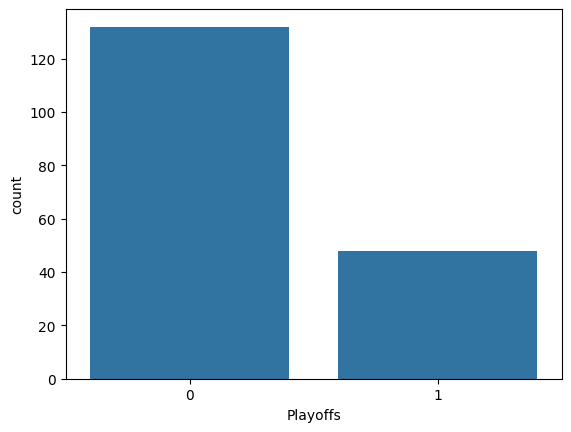

In [98]:
import seaborn as sns

sns.countplot(data=baseball_moneyball, x='Playoffs')

/var/folders/2p/d_nj_y2s0p32_2p156bn343c0000gn/T/ipykernel_36695/606050519.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



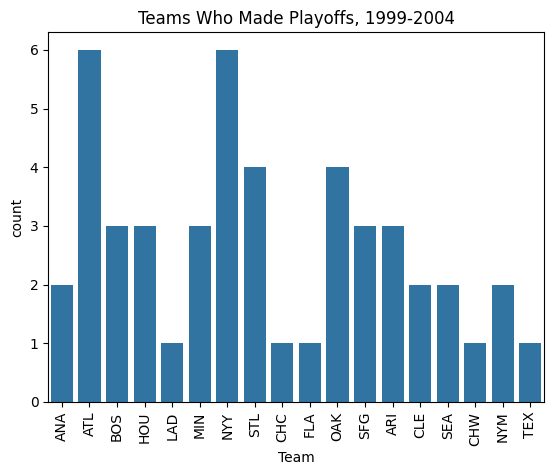

In [99]:
# Teams who made the playoffs in 1999-2004

import matplotlib.pyplot as plt

plot=sns.countplot(data =baseball_moneyball[baseball["Playoffs"]==1], x="Team");

plt.setp(plot.get_xticklabels(), rotation=90);
plt.title("Teams Who Made Playoffs, 1999-2004");

## EDA:  How many wins do teams need to make the playoffs?

In [100]:
baseball_moneyball.groupby(["Playoffs"]).agg({"W":["min", "mean", "median", "max"]}).reset_index()

Playoffs   W                       
           min       mean median  max
0        0  43  75.363636   75.0   96
1        1  87  96.187500   95.0  116

## Visualizing Quantitative Distribution (Wins) vs Qualitative (Playoffs)
### a). Using Overlaid Histograms


In [101]:
mean_win_playoffs=baseball_moneyball[baseball_moneyball["Playoffs"]==1]["W"].mean()
median_win_playoffs=baseball_moneyball[baseball_moneyball["Playoffs"]==1]["W"].median()


fig = px.histogram(baseball_moneyball, x="W", color = "Playoffs", barmode="overlay", nbins=35, title = "Overlaid Histograms of Number Wins in a Given Season For Teams Who Made Playoffs vs Who Didn't")

#fig.add_vline(x=mean_win_playoffs, line_width=3, line_dash="dash", line_color="blue",  annotation_text = "mean (blue) and median (red) for Playoffs=1" )
#fig.add_vline(x=median_win_playoffs, line_width=3, line_dash="dash", line_color="red")

fig.show()



/Users/abdullah/Library/Python/3.9/lib/python/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



### b).  Visualizing Quantitative Distribution (Wins) vs Qualitative (Playoffs)  
##### Using  Scatter vs Strip Plot

https://plotly.com/python/distplot/

In [102]:
# Option 1: Scatter Plot

# This can suffer from overplotting if multiple datapoints have the same output
fig = px.scatter(baseball_moneyball, x="W", y="Playoffs")

fig.update_yaxes(type='category', categoryorder='category ascending')

fig.show()


In [103]:
# Option 2: Strip Plot:  This "jitters" the categorical data slightly so that you don't have any overplotting

fig = px.strip(baseball_moneyball, x="W", y="Playoffs")

fig.update_yaxes(type='category', categoryorder='category ascending')

fig.show()

Recall above, we calculated RD (run difference:  Runs Scored minus Runs Allowed).  Let's add this column to the `baseball_moneyball` dataframe and then visualize how it's related to Wins:
 

In [104]:

baseball_moneyball = baseball_moneyball.assign(RD = baseball["RS"]-baseball["RA"])

fig = px.scatter(baseball_moneyball, x="RD", y="W")


fig.show()


So Run Difference is related to Wins;  Now we can ask: what variables are related to Run Difference?

In [105]:
baseball_moneyball.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
240,ANA,AL,2004,836,734,92,0.341,0.429,0.282,1,6.0,4.0,162,0.326,0.415,102
241,ARI,NL,2004,615,899,51,0.310,0.393,0.253,0,NaN,NaN,162,0.350,0.439,-284
242,ATL,NL,2004,803,668,96,0.343,0.434,0.270,1,4.0,4.0,162,0.329,0.400,135
243,BAL,AL,2004,842,830,78,0.345,0.432,0.281,0,NaN,NaN,162,0.348,0.404,12
244,BOS,AL,2004,949,768,98,0.360,0.472,0.282,1,3.0,1.0,162,0.318,0.408,181


In [106]:
# We can see that SLG is associated with RD - this was a commonly used statistic to choose players

fig = px.scatter(baseball_moneyball, x="SLG", y="RD")


fig.show()

In [107]:
# However, notice that  OBP is also associated with RD - this was an undervalued statistic during the time of Monyeball
# The Oakland A's used this to their advantage by recruiting players with high OBP that had been overlooked.

fig = px.scatter(baseball_moneyball, x="OBP", y="RD")


fig.show()